<a href="https://colab.research.google.com/github/Ahmdridwan28/Spatial_filtering/blob/main/Spatial_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

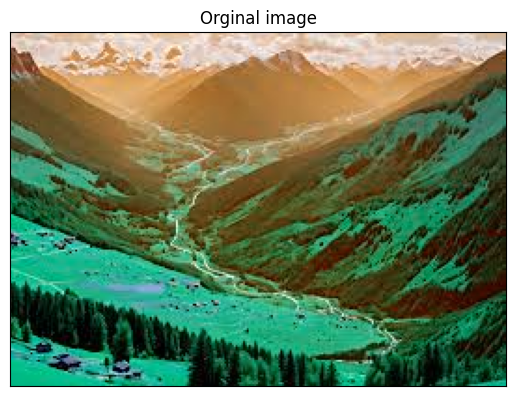

In [4]:
Gambar = cv2.imread ('/content/drive/MyDrive/Foto/Gambar 5.jpeg')
plt.imshow(Gambar),plt.grid(False)

plt.title('Orginal image')
plt.xticks([])
plt.yticks([])
plt.show()

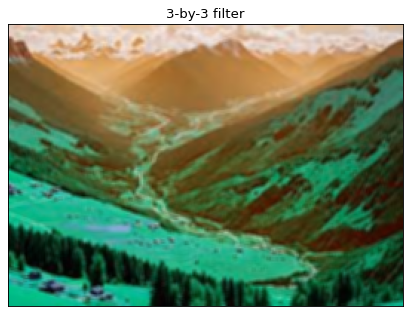

In [8]:
#1.Averaging filter
# defining a kernel
kernel_3 = np.ones((3,3),np.float32)/9

#convoles image
filtered_3 = cv2.filter2D(Gambar,-1,kernel_3)

#plot the results
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

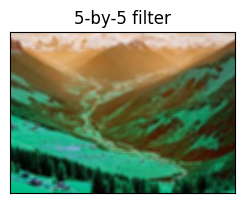

In [9]:
#Defining kernel
kernel_5 = np.ones((5,5),np.float32)/25

#Convolves image
filtered_5 = cv2.filter2D(Gambar,-1,kernel_5)

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

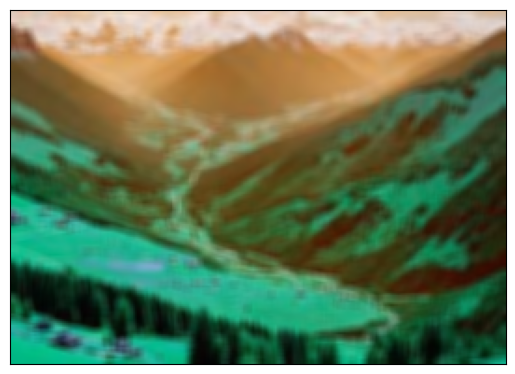

In [11]:
# you can check the docs for further information.
blurred = cv2.blur(Gambar, (5, 5), -1)

plt.imshow(blurred),plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

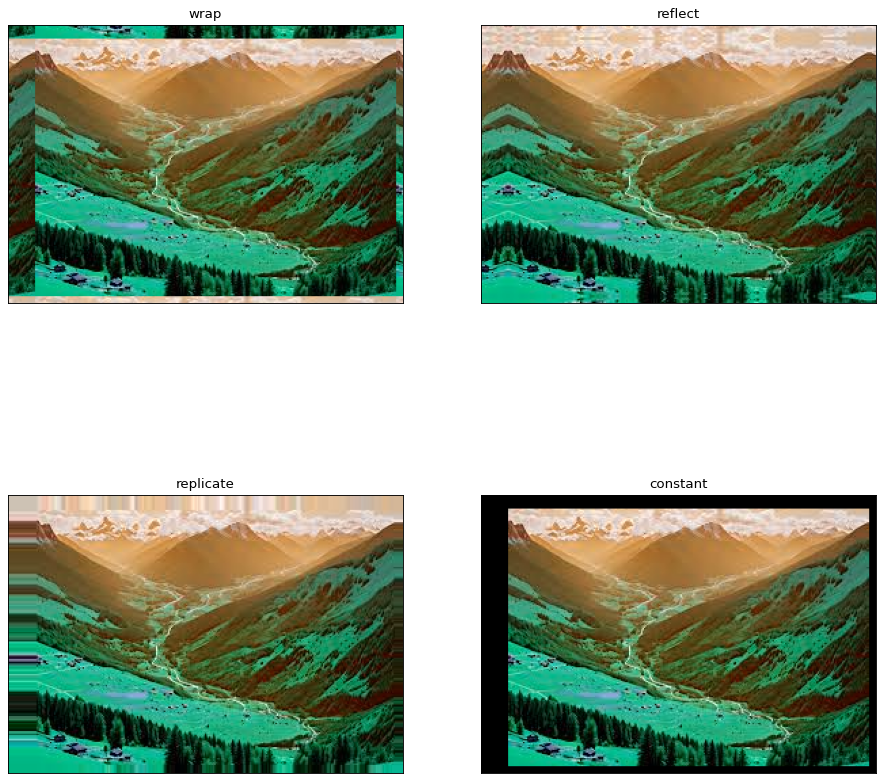

In [13]:
#2.Padding
top = 10; bottom = 5; left = 20; right = 5
const = 100
image1 = cv2.copyMakeBorder(Gambar, top, bottom, left, right,
                          cv2.BORDER_WRAP)
image2 = cv2.copyMakeBorder(Gambar, top, bottom, left, right,
                          cv2.BORDER_REFLECT)
image3 = cv2.copyMakeBorder(Gambar, top, bottom, left, right,
                          cv2.BORDER_REPLICATE)
image4 = cv2.copyMakeBorder(Gambar, top, bottom, left, right,
                          cv2.BORDER_CONSTANT, const)

#Display images
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(image1), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(image2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(image3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(image4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

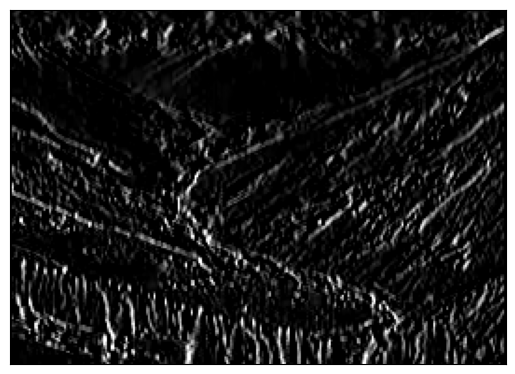

In [17]:
#3-User-defined kernels
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

#apply
filter_v = cv2.filter2D(Gambar[:, :, 2], -1, vertical_gd)

#show
plt.imshow(filter_v, cmap='gray'),plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()


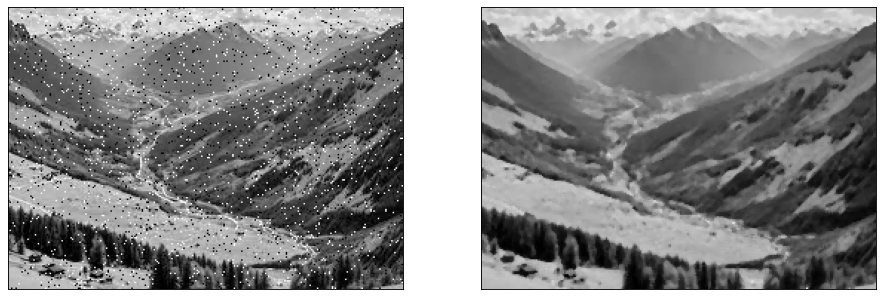

In [21]:
#Median filtering
s_and_p = np.random.rand(Gambar.shape[0], Gambar.shape[1])

salt = s_and_p > .975
pepper = s_and_p < .025

#turn on white
channel_2 = np.atleast_1d(Gambar[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]

#apply median filter
Med = cv2.medianBlur(noisy, 3)

#display the results
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.imshow(noisy, cmap='gray')
plt.grid(False)

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.imshow(Med, cmap='gray')
plt.grid(False)
plt.show()

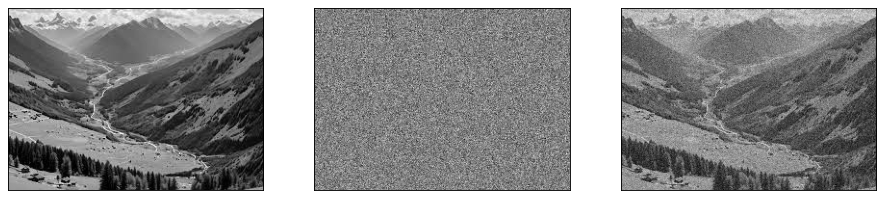

In [24]:
#5.Gaussian filtering
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (Gambar.shape[0], Gambar.shape[1]))

# Convert RGB
gray = cv2.cvtColor(Gambar, cv2.COLOR_BGR2GRAY)

# gaussian noise
g_noisy = gray + gauss_noise

# Showing gray image, noise image, and noisy image
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(131)
plt.xticks([])
plt.yticks([])
plt.imshow(gray, cmap='gray')
plt.grid(False)

plt.subplot(132)
plt.xticks([])
plt.yticks([])
plt.imshow(gauss_noise, cmap='gray')
plt.grid(False)

plt.subplot(133)
plt.xticks([])
plt.yticks([])
plt.imshow(g_noisy, cmap='gray')
plt.grid(False)

([], [])

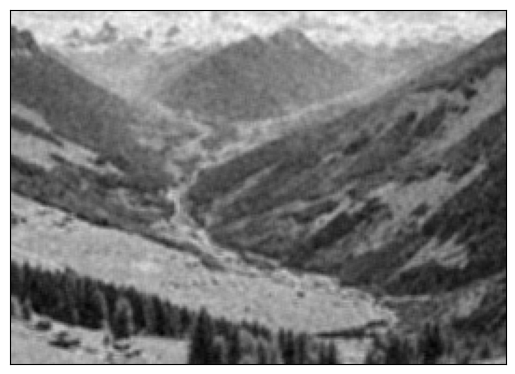

In [25]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

# Display
plt.imshow(g_filtered, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

[[0.33319442]
 [0.33361117]
 [0.33319442]]


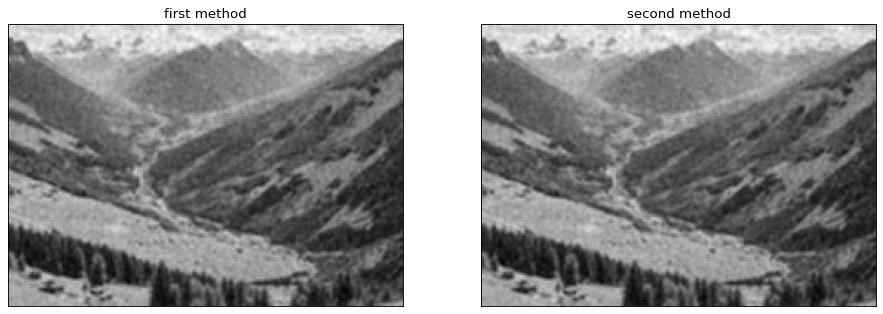

In [27]:
#single gaussian kernel
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)

# 2 kernels over the image.
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

# Displaying
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.title('first method')
plt.imshow(g_filtered, cmap='gray')
plt.grid(False)

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.title('second method')
plt.imshow(g_filtered_2, cmap='gray')
plt.grid(False)